In [1]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
from vega_datasets import data

# 使用 DataFrame 運算取得雨量並轉換為NumPy陣列
rainfall_mm = np.array(data.seattle_weather().set_index('date')['precipitation']['2015'])
len(rainfall_mm)

365

(array([262.,  22.,  14.,   9.,  10.,   6.,   6.,   5.,   2.,   3.,   1.,
          2.,   2.,   3.,   0.,   2.,   2.,   0.,   3.,   2.,   1.,   2.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.    ,  1.3975,  2.795 ,  4.1925,  5.59  ,  6.9875,  8.385 ,
         9.7825, 11.18  , 12.5775, 13.975 , 15.3725, 16.77  , 18.1675,
        19.565 , 20.9625, 22.36  , 23.7575, 25.155 , 26.5525, 27.95  ,
        29.3475, 30.745 , 32.1425, 33.54  , 34.9375, 36.335 , 37.7325,
        39.13  , 40.5275, 41.925 , 43.3225, 44.72  , 46.1175, 47.515 ,
        48.9125, 50.31  , 51.7075, 53.105 , 54.5025, 55.9   ]),
 <BarContainer object of 40 artists>)

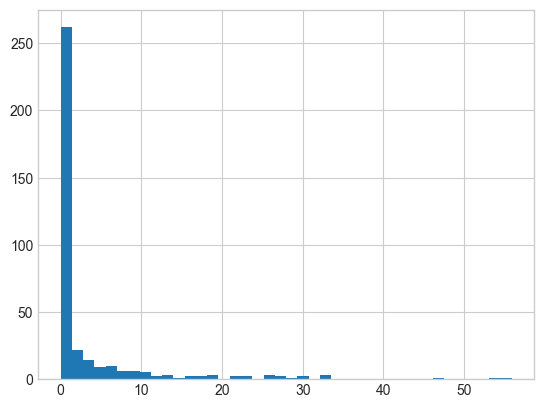

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.hist(rainfall_mm, 40)

In [4]:
x = np.array([1, 2, 3, 4, 5])
print(x<3)
print(x>3)
print(x<=3)
print(x>=3)
print(x!=3)
print(x==3)

#可以使用複合敘述
print((2 * x) == (x ** 2))

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]
[False  True False False False]


In [5]:
# 也可以用在多維陣列上
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
print(x)
print(x < 6)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]
[[False  True  True  True]
 [False False  True  True]
 [ True False  True  True]]


In [6]:
# 在布林陣列上進行運算
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
print(x)

print(np.count_nonzero(x < 6))

print(np.sum(x < 6))
#每一列的加總值
print(np.sum(x < 6, axis=1))

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]
8
8
[3 2 3]


In [7]:
# 快速檢查所有值或任一值是否為true 可以使用 np.any() np.all()
print(np.any(x > 8))
print(np.any(x < 0))
print(np.all(x < 10))
print(np.all(x == 6))
print(np.all(x < 8, axis=1))

True
False
True
False
[False False  True]


In [8]:
# 找出降雨量介於10-20毫米之間的天數
print(np.sum((rainfall_mm > 10) & (rainfall_mm < 20)))

# 找出降雨量大於10 或 小於20毫米之間的天數
print(np.sum((rainfall_mm > 10) | (rainfall_mm < 20)))

# 找出降雨量介於10-20毫米之間的天數 (使用迪摩根定律)
print(np.sum(~((rainfall_mm < 10) | (rainfall_mm > 20))))

16
365
16


In [10]:
# 可以將布林陣列當成是遮罩 取得值為true 的元素值 會回傳一個一維陣列
print(x)
print(x < 5)
print(x[x < 5])

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]
[[False  True  True  True]
 [False False  True  True]
 [ True False  True  True]]
[4 0 3 3 1 3 4 0]


In [13]:
# 建立一個都是下雨天的遮罩
rainy = (rainfall_mm > 0)
# 建立一個都是夏天的遮罩 (6月21日是第172天)
days = np.arange(365)
summer = (days > 172) & (days < 262)

# 下雨天的雨量中位數
print(np.median(rainfall_mm[rainy]))
# 夏季下雨天的雨量中位數
print(np.median(rainfall_mm[summer & rainy]))
# 夏季的最大降雨量
print(np.max(rainfall_mm[summer]))
# 非夏季下雨天的雨量中位數
print(np.max(rainfall_mm[rainy & ~summer]))


3.8
1.9
32.5
55.9
